<a href="https://colab.research.google.com/github/Prakshi598/Test-and-train/blob/main/True_and_Fake_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#True and Fake prediction
#DESCRIPTION

   DATA STRUCTURE AND CONTENT

   DATA PREPROCESSING

  
   *Removal of null values

   *Tokenization

   *Lowering the cases

   *Removal of punctuations

   *Removal of stopwords

   *Stemming and lammatization

   VECTORIZATION

   SAVING THE MODEL

   SUMMARY

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#mounds the datasets from the drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
# importing the required libraries for the analysis of the project

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/True and Fake News Prediction/test.csv')
#read the data present in test dataset

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/True and Fake News Prediction/train.csv')
#read the data present in train dataset

#DATA STRUCTURE AND CONTENT

In [ ]:
train.shape
# shape function helps us to identify how many rows and columns we have according to our dataset

(20800, 5)

In [ ]:
test.shape

(5200, 4)

In [ ]:
train.info
#displays a summary of the dataframe including the number of non-null entries,datatypes and memory usage

<bound method DataFrame.info of           id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1      Ever get the feeling your life circles the rou...      0  
2      Why the Truth Might Get You Fired October 29, ...      1  
3      Videos 15 Civilians Killed In Single US Airstr...      1  
4      Print \nAn Iranian woman has been sentenced to...      1  
...                                                  ...    ...  
20795  Rapper T. I. unloaded on black celebrities who...      0  
20796  When the Green Bay Packers lost to the Washing...      0  
20797  The Macy’s of today grew from the union of sev...      0  
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  
20799    David Swanson is an author, activist, journa...      1  

[20800 rows x 5 columns]>

In [ ]:
train.isnull ().sum()
#identifies the null values in train dataset

,0
id,0
title,558
author,1957
text,39
label,0


In [ ]:
train.describe
#provides summary statistics of the train dataset

<bound method NDFrame.describe of           id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1      Ever get the feeling your life circles the rou...      0  
2      Why the Truth Might Get You Fired October 29, ...      1  
3      Videos 15 Civilians Killed In Single US Airstr...      1  
4      Print \nAn Iranian woman has been sentenced to...      1  
...                                                  ...    ...  
20795  Rapper T. I. unloaded on black celebrities who...      0  
20796  When the Green Bay Packers lost to the Washing...      0  
20797  The Macy’s of today grew from the union of sev...      0  
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  
20799    David Swanson is an author, activist, journa...      1  

[20800 rows x 5 columns]>

In [ ]:
train.head()
#shows the first few rows of train dataset

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
test.info

<bound method DataFrame.info of          id                                              title  \
0     20800  Specter of Trump Loosens Tongues, if Not Purse...   
1     20801  Russian warships ready to strike terrorists ne...   
2     20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3     20803  Tim Tebow Will Attempt Another Comeback, This ...   
4     20804                    Keiser Report: Meme Wars (E995)   
...     ...                                                ...   
5195  25995  The Bangladeshi Traffic Jam That Never Ends - ...   
5196  25996  John Kasich Signs One Abortion Bill in Ohio bu...   
5197  25997  California Today: What, Exactly, Is in Your Su...   
5198  25998  300 US Marines To Be Deployed To Russian Borde...   
5199  25999  Awkward Sex, Onscreen and Off - The New York T...   

                       author  \
0            David Streitfeld   
1                         NaN   
2               Common Dreams   
3               Daniel Victor   
4     Truth Broadcast Network   
...                       ...   
5195               Jody Rosen   
5196      Sheryl Gay Stolberg   
5197             Mike McPhate   
5198                      NaN   
5199              Teddy Wayne   

                                                   text  
0     PALO ALTO, Calif.  —   After years of scorning...  
1     Russian warships ready to strike terrorists ne...  
2     Videos #NoDAPL: Native American Leaders Vow to...  
3     If at first you don’t succeed, try a different...  
4     42 mins ago 1 Views 0 Comments 0 Likes 'For th...  
...                                                 ...  
5195  Of all the dysfunctions that plague the world’...  
5196  WASHINGTON  —   Gov. John Kasich of Ohio on Tu...  
5197  Good morning. (Want to get California Today by...  
5198  « Previous - Next » 300 US Marines To Be Deplo...  
5199  Perhaps you’ve seen the new TV series whose pi...  

[5200 rows x 4 columns]>

In [ ]:
test.isnull ().sum()
#identifies the null values in test dataset

,0
id,0
title,122
author,503
text,7


In [ ]:
test.describe

<bound method NDFrame.describe of          id                                              title  \
0     20800  Specter of Trump Loosens Tongues, if Not Purse...   
1     20801  Russian warships ready to strike terrorists ne...   
2     20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3     20803  Tim Tebow Will Attempt Another Comeback, This ...   
4     20804                    Keiser Report: Meme Wars (E995)   
...     ...                                                ...   
5195  25995  The Bangladeshi Traffic Jam That Never Ends - ...   
5196  25996  John Kasich Signs One Abortion Bill in Ohio bu...   
5197  25997  California Today: What, Exactly, Is in Your Su...   
5198  25998  300 US Marines To Be Deployed To Russian Borde...   
5199  25999  Awkward Sex, Onscreen and Off - The New York T...   

                       author  \
0            David Streitfeld   
1                         NaN   
2               Common Dreams   
3               Daniel Victor   
4     Truth Broadcast Network   
...                       ...   
5195               Jody Rosen   
5196      Sheryl Gay Stolberg   
5197             Mike McPhate   
5198                      NaN   
5199              Teddy Wayne   

                                                   text  
0     PALO ALTO, Calif.  —   After years of scorning...  
1     Russian warships ready to strike terrorists ne...  
2     Videos #NoDAPL: Native American Leaders Vow to...  
3     If at first you don’t succeed, try a different...  
4     42 mins ago 1 Views 0 Comments 0 Likes 'For th...  
...                                                 ...  
5195  Of all the dysfunctions that plague the world’...  
5196  WASHINGTON  —   Gov. John Kasich of Ohio on Tu...  
5197  Good morning. (Want to get California Today by...  
5198  « Previous - Next » 300 US Marines To Be Deplo...  
5199  Perhaps you’ve seen the new TV series whose pi...  

[5200 rows x 4 columns]>

In [ ]:
test.head()
# shows the first few rows of test dataset

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


#DATA PREPROCESSING

# 1.Removing the null values

In [ ]:
train=train.fillna(' ')
# filling missing values with a space character

In [ ]:
train.isnull ().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [ ]:
test=test.fillna(' ')

In [ ]:
test.isnull ().sum()

,0
id,0
title,0
author,0
text,0


In [ ]:
train['subject']=train['author'] + '' + train['title']
# concentrate 'author'and'title'columns to create 'subject'column train['subject']=train['author']+ ' ' +train['title']

In [ ]:
train.head()

,id,title,author,text,label,subject
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


# 2.Tokenization

In [ ]:
import nltk
nltk.download ('punkt')
# download the 'punkt' tokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
train['tokens']=train['subject'].apply(word_tokenize)
# tokenizing the 'subject'column in train dataset and storing the result in a new 'token' column

In [ ]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


# 3.Lowering the cases

In [ ]:
train['subject']=train['subject'].str.lower()
# converts the 'subject'column to lower cases

In [ ]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucushouse dem aide: we didn’t even se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillary clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhy the truth might get you ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilians killed in single u...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


# 4.Removal of punctuations

In [ ]:
train['subject']=train['subject'].str.replace('[^\w\s]',' ')
# replaces all non-alphanumeric characters in the 'subject' column eith a space

In [ ]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucushouse dem aide: we didn’t even se...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillary clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhy the truth might get you ...,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilians killed in single u...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jailed for fiction...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


# 5.Removal of stop words

In [ ]:
from nltk.corpus import stopwords
# importing stopwords from nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('stopwords')
# Downloading the stopwords that are present in English Langugae

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
sw=set(stopwords.words ('english'))
#create a set of english stopwords

In [ ]:
train['subject'] = train['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))
# Here we try to remove the stopwords by adding only the words which are not in the sw stopword set.

In [ ]:
train.head()

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucushouse dem aide: didn’t even see c...,"[Darrell, LucusHouse, Dem, Aide, :, We, Didn, ..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynnflynn: hillary clinton, big wom...","[Daniel, J., FlynnFLYNN, :, Hillary, Clinton, ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.comwhy truth might get fired,"[Consortiumnews.comWhy, the, Truth, Might, Get..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss15 civilians killed single us a...,"[Jessica, Purkiss15, Civilians, Killed, In, Si..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoyiranian woman jailed fictional u...,"[Howard, PortnoyIranian, woman, jailed, for, f..."


# 6.Stemming and Lammatization

In [ ]:
from nltk.stem import PorterStemmer
# import PorterStemmer from nltk

In [ ]:
stemmer=PorterStemmer()
#To Apply Stemming or Lemmatization : stemmer = PorterStemmer()
train['subject'] = train['subject'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
# Stemming is the simple process of reducing the words to their root forms

# VECTORISATION

In [ ]:
x=train['subject']
y=train['label']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#importing TfidfVectorizer from sklearn

In [ ]:
vt=TfidfVectorizer()
vt.fit(x)

TfidfVectorizer()

In [ ]:
x.head()

,subject
0,darrel lucushous dem aide: didn’t even see com...
1,"daniel j. flynnflynn: hillari clinton, big wom..."
2,consortiumnews.comwhi truth might get fire
3,jessica purkiss15 civilian kill singl us airst...
4,howard portnoyiranian woman jail fiction unpub...


In [ ]:
x=vt.transform(x)
#transform x using vt

In [ ]:
print(x)

  (0, 30011)	0.2702317405535354
  (0, 25953)	0.23633175774140575
  (0, 17287)	0.39616172821890755
  (0, 16772)	0.2687730240968852
  (0, 14864)	0.2267902704938032
  (0, 9503)	0.2131010345817379
  (0, 7770)	0.2725285388588018
  (0, 7469)	0.26535031144709154
  (0, 7127)	0.3269077189450684
  (0, 5991)	0.22776883917952795
  (0, 5117)	0.3339547020931297
  (0, 1090)	0.36074580999296135
  (1, 31859)	0.36688013213305515
  (1, 13172)	0.2508638367430399
  (1, 10395)	0.5226747357728401
  (1, 7068)	0.31638169487081524
  (1, 5725)	0.23248708292981804
  (1, 4720)	0.464055696418436
  (1, 4070)	0.18539331285820687
  (1, 3346)	0.35413476846519715
  (2, 29899)	0.36635739112785753
  (2, 18743)	0.4315491786494108
  (2, 11172)	0.3064339824029749
  (2, 10169)	0.3472323577842834
  (2, 6291)	0.404084133229652
  :	:
  (20797, 28830)	0.3162590151970751
  (20797, 25250)	0.2481398859255049
  (20797, 23768)	0.2719892730679363
  (20797, 23448)	0.24910787789148428
  (20797, 20003)	0.08061747005948777
  (20797, 18695)

In [ ]:
# For building the machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# For evaluating the models using the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import classification_report

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
ytrpredict=model.predict(xtrain)
#predicted the y values in train dataset

In [ ]:
accuracy =accuracy_score(ytrain,ytrpredict)
precision = precision_score(ytrain,ytrpredict)
recall = recall_score(ytrain,ytrpredict)
f1=f1_score(ytrain,ytrpredict)

print(' training accuracy:', accuracy)
print(' training Precision:', precision)
print(' training recall:', recall)
print('training f1 Score:',f1)

 training accuracy: 0.971875
 training Precision: 0.9519429753966429
 training recall: 0.9939975990396158
training f1 Score: 0.9725158562367864


In [ ]:
yttpredict=model.predict(xtest)
#predicted the y value in test datasets

In [ ]:
accuracy =accuracy_score(ytest,yttpredict)
precision = precision_score(ytest, yttpredict)
recall= recall_score(ytest, yttpredict)
f1 = f1_score(ytest, yttpredict)

print('testing accuracy:', accuracy)
print('testing precision:', precision)
print(' testing recall:', recall)
print('testing f1 Score:', f1)

testing accuracy: 0.9504807692307692
testing precision: 0.9180400890868596
 testing recall: 0.9894383101296207
testing f1 Score: 0.9524029574861367


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#import confusion matrix from sklearn

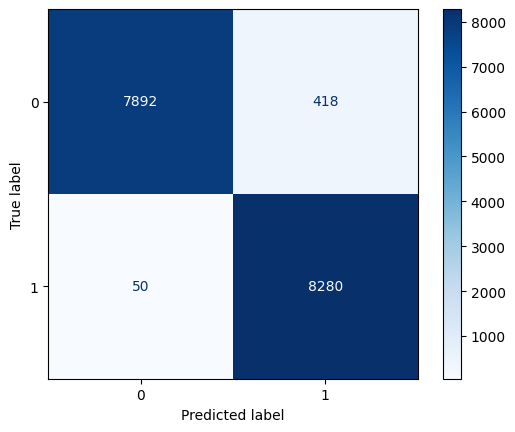

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(ytrain,ytrpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

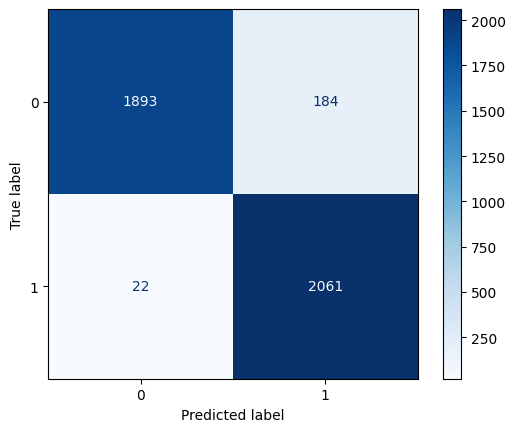

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(ytest,yttpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

#Saving the model

In [ ]:
import pickle

#SUMMARY

  * In this project true and fake prediction ,we started with mounding thr datasets from the drive and  imported the required libraries for the project.
  * Then we used the explored the train and tset datasets by using numpy and pandas libraries.
  *Then we checked for the null values using a library called isnull().

  *We used shape library to identify how many rows and columns are there in a dataset.

  *Removed null values from the dataset using fillna().

  *Tokenizing the 'subject'column in train and test dataset and storing the result in a new 'token' column.

  *Lowered the cases for 'subject' column in train dataset.

  *Removed the punctuations and stopwords from the 'subject' coulomn.

  *We did stemming,lammatization and vectorization.

  *In conclusion we saved the model using pickle library.